# 3.1 Analysen des OCR-Korpus

## 1. Bibliotheken

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
#import seaborn as sns
#from collections import  Counter
import numpy as np
#import re

## 2. Datenimport und Erstellung eines intialen OCR-Dataset

##### zur Verfügung gestellt durch das FWF-Forschungsprojekt "The making of the incredibly differentiated labor market: Evidence from job offers from ten decades"

In [2]:
df_regions = pd.read_csv('../input/regions_ft.csv')
len(df_regions)

13581

### 2.1. Leere Spalten im Korpus ( "tess_ONB_1.192_300739_989350" )

Checkt, ob manche Spalten aus Versehen kein OCR enthalten. 

In [3]:
df_regions_nan = df_regions[df_regions['tess_ONB_1.192_300739_989350'].isna()]
len(df_regions_nan)

88

#### Löschen alle Zeilen in denen die Spalte "tess_ONB_1.192_300739_989350" keinen Inhalt hat

In [4]:
df_regions = df_regions.dropna(subset = ["tess_ONB_1.192_300739_989350"])

len(df_regions)


13493

### 2.2. Anreicherung des Dataframes mit dem Datum aus dem Identifier

Hier werden der identifier, sowie ein Datum aus dem img_name extrahiert. 
Ebenfalls verwendet die vorliegende Arbeit lediglich die OCR des UB Mannheim Tesseract Modells ("tess_ONB_1.192_300739_989350"). Aus diesem Grund werden alle weiteren Spalten nicht mehr benötigt

In [5]:
# create an identifier by strip the .jpg
df_regions['identifier'] = df_regions['img_name'].str.rstrip('.jpg')

# add the date
search = []    
for values in df_regions['identifier']:
    search.append(re.search(r'\d\d\d\d', values).group())

df_regions['date'] = search
df_regions = df_regions.astype({'date': int})


In [6]:
# filter for columns we need
df_ocr = df_regions[["identifier", "region_class", "pub_id", "pub_name", "img_name", "date", "tess_ONB_1.192_300739_989350" ]]

df_ocr. rename(columns = {'tess_ONB_1.192_300739_989350':'OCR_text'}, inplace = True)

df_ocr.tail()

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5362/2273702464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocr. rename(columns = {'tess_ONB_1.192_300739_989350':'OCR_text'}, inplace = True)


,identifier,region_class,pub_id,pub_name,img_name,date,OCR_text
13576,awi_19481002_7_SEARCH_64,SEARCH,awi,Arbeiterwille,awi_19481002_7_SEARCH_64.jpg,1948,"Dame mittleren Alters, re⸗\npräsentationsfählg..."
13577,awi_19481002_7_SEARCH_65,SEARCH,awi,Arbeiterwille,awi_19481002_7_SEARCH_65.jpg,1948,"Ehrlicher, elßiner.\nselbständiger Elektro⸗- u..."
13578,awi_19481002_7_SEARCH_66,SEARCH,awi,Arbeiterwille,awi_19481002_7_SEARCH_66.jpg,1948,"Kraftfahrer, Klasse 2.\n20jährige Prazis, gute..."
13579,awi_19481002_7_HEADING_67,HEADING,awi,Arbeiterwille,awi_19481002_7_HEADING_67.jpg,1948,\n
13580,awi_19481002_7_HEADING_68,HEADING,awi,Arbeiterwille,awi_19481002_7_HEADING_68.jpg,1948,\n


## Analysen

### 3.1. Verteilung von Zeitungen im Gesamtkorpus (OCR)

#### Verteilung der Anzeigen zwischen Gesuch (Search) und Anzeigen (Offer) Gesamtkorpus

<AxesSubplot:xlabel='Kategorie der Anzeige', ylabel='Anzahl der Anzeigen je Kategorie'>

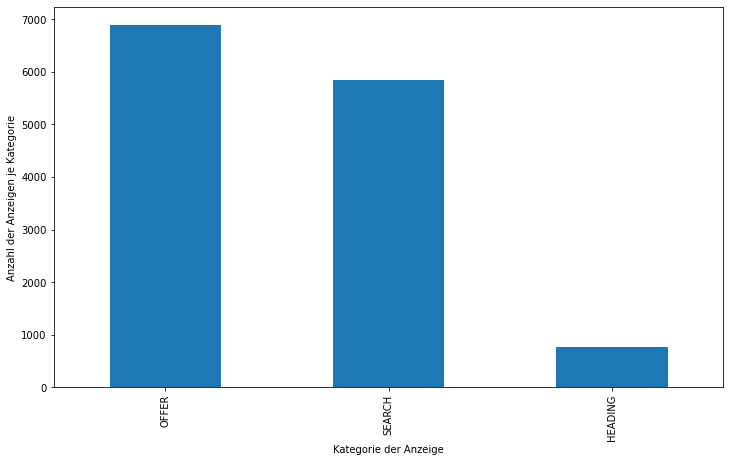

In [7]:
# Visualization of news region_class and article count in the dataset 

plt.figure(figsize=(12,7))

plt.xlabel("Kategorie der Anzeige")
plt.ylabel("Anzahl der Anzeigen je Kategorie")

df_ocr.region_class.value_counts().plot(kind='bar')

In [8]:
df_ocr.head()

,identifier,region_class,pub_id,pub_name,img_name,date,OCR_text
0,ptb_19300406_20_SEARCH_0,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_0.jpg,1930,"Junger Mann\naus der Kolonalwarenbranche,\nnac..."
1,ptb_19300406_20_SEARCH_1,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_1.jpg,1930,"21jähriger Beamter,\n\nmilitärfrei, in ekündig..."
2,ptb_19300406_20_SEARCH_2,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_2.jpg,1930,Bilanzbuchhalter\nmit Lansskirr. Praxis in der...
3,ptb_19300406_20_SEARCH_3,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_3.jpg,1930,"Techniker,\n\n24 Jahre, militärfrei. Abſolvent..."
4,ptb_19300406_20_SEARCH_4,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_4.jpg,1930,"Jüngerer Kontoriſt,\n19 Jahre, Deutſch, elwas ..."


In [9]:
df_regions.head(1)

,Unnamed: 0,region_class,bbox,img_name,page,pub_id,tess_ONB_1.192_300739_989350,tess_deu,pub_name,idx,fasttext_corrected,identifier,date
0,0,SEARCH,"BBox(x1=3097.892578125, x2=3537.60009765625, y...",ptb_19300406_20_SEARCH_0.jpg,http://anno.onb.ac.at/cgi-content/anno?aid=ptb...,ptb,"Junger Mann\naus der Kolonalwarenbranche,\nnac...","Junger Maun\naus der Solomaliverenbrandge,\nna...",Prager Tagblatt,NaN,"junger mann\naus der kolonialwarenbranche,\nna...",ptb_19300406_20_SEARCH_0,1930


#### Headings und ihre Inhalte.

Werden Headings benötigt? 

In [10]:
df_headings = df_regions[["region_class", "page", "tess_ONB_1.192_300739_989350"]]
df_headings = df_headings[df_headings.region_class == "HEADING"]
df_headings.head()

,region_class,page,tess_ONB_1.192_300739_989350
41,HEADING,http://anno.onb.ac.at/cgi-content/anno?aid=ptb...,"männliche,\n\n \n"
42,HEADING,http://anno.onb.ac.at/cgi-content/anno?aid=ptb...,Stellen⸗Hesuche\n
43,HEADING,http://anno.onb.ac.at/cgi-content/anno?aid=ptb...,#r.\nVeibliche: y\n
44,HEADING,http://anno.onb.ac.at/cgi-content/anno?aid=ptb...,männliche:\n—s. ngs- 27 3 W neE#k.\n
45,HEADING,http://anno.onb.ac.at/cgi-content/anno?aid=ptb...,\n\nOffene Stellen\n\n \n


In [11]:
df_headings["tess_ONB_1.192_300739_989350"].iloc[4]

' \n\nOffene Stellen\n\n \n'

In [12]:
headings = df_headings["tess_ONB_1.192_300739_989350"]
headings_set = set(headings)
headings_set

{' \n',
 ' \n\n \n',
 ' \n\n \n\nH\n\nweibliche:\n\n—..mgrrstmrrr,nmmerg\n',
 ' \n\n \n\nweibliche:\n\n—emmsssssnmmnmr rrr\n',
 ' \n\n#\n',
 ' \n\n*\n',
 ' \n\n*\n\nOttene Stellen\n',
 ' \n\n**\n',
 ' \n\n***\n',
 ' \n\n***“**. . .\nSiellen⸗besuehe.\n',
 ' \n\n8fRLLENANZHISEK\n',
 ' \n\nAibritemartt.\n',
 ' \n\nArbeitemarkt\n',
 ' \n\nHrheltzmarkt\n',
 ' \n\nIArbeitsnarfkt\n',
 ' \n\nK&\n',
 ' \n\nMeibliche.\n',
 ' \n\nMänanliche.\n\n \n',
 ' \n\nMännliche.\n',
 ' \n\nMännliche.\n—...\n',
 ' \n\nMännliche:\n',
 ' \n\nMäüönalich.\n',
 ' \n\nOffene K..# H\n',
 ' \n\nOffene Stellen\n',
 ' \n\nOffene Stellen\n\n \n',
 ' \n\nOlſtene Stellen\n',
 ' \n\nOtene Stellen\n',
 ' \n\nOtfene Stellen\n\n \n',
 ' \n\nPeibliche.\n',
 ' \n\nReelen-bestehe.\n',
 ' \n\nSeels-desuche.\n',
 ' \n\nStellen Gestche.\n',
 ' \n\nStellen-Gesuche.\n',
 ' \n\nStellen-⸗Gesuche\n',
 ' \n\nVeeintiene.y\n\nr#r#rrr.rarrrrr\n\n \n',
 ' \n\nWeibhliche:\n',
 ' \n\nWeibliche.\n',
 ' \n\nWeibliche.\n\n \n',
 ' \n\nWeibliche:

"Headings", also Überschriften, sind für die Analyse von Anzeigen nicht relevant. Aus diesem Grund werden diese Zeilen aus dem Dataframe genommen. 

<AxesSubplot:xlabel='Kategorie der Anzeige', ylabel='Anzahl der Anzeigen je Kategorie'>

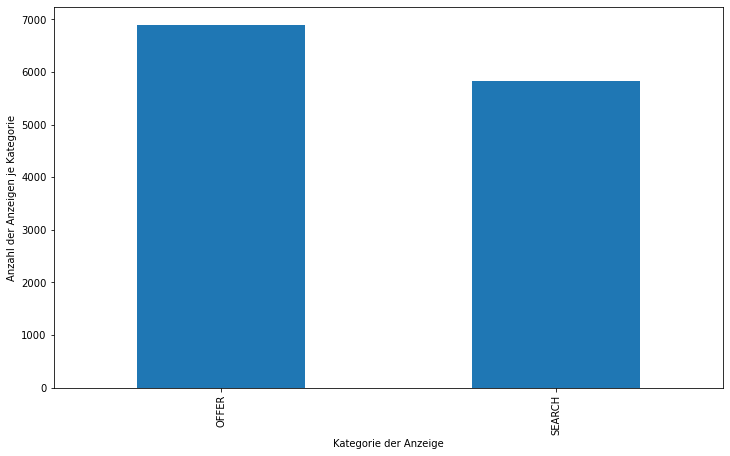

In [13]:
df_ads = df_ocr[df_ocr.region_class != "HEADING"]

#color_list = list('yc')
plt.figure(figsize=(12,7))

plt.xlabel("Kategorie der Anzeige")
plt.ylabel("Anzahl der Anzeigen je Kategorie")

df_ads.region_class.value_counts().plot(kind='bar')

### 3.2. Verteilung der Anzahl der Anzeigen je Zeitungen 

<AxesSubplot:xlabel='Zeitungsnamen', ylabel='Zahl der Anzeigen'>

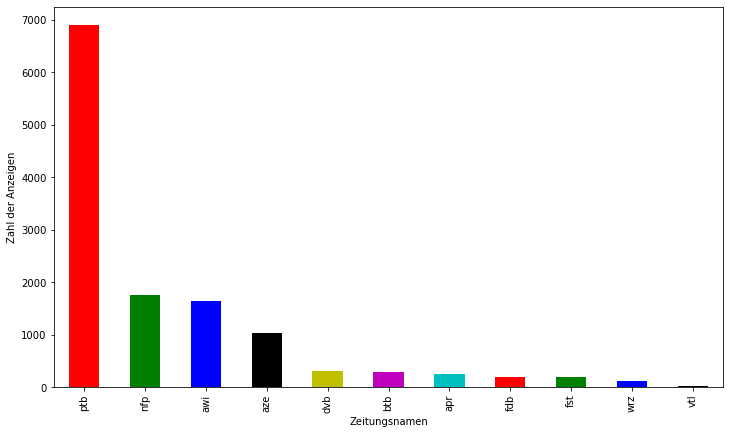

In [14]:
# Visualization of news pub_name and Job advertisement count in the dataset

color_list = list('rgbkymc')
plt.figure(figsize=(12,7))

plt.xlabel("Zeitungsnamen")
plt.ylabel("Zahl der Anzeigen")

df_ads.pub_id.value_counts().plot(kind='bar', color=color_list)

<AxesSubplot:xlabel='Zeitungsnamen', ylabel='Zahl der Anzeigen'>

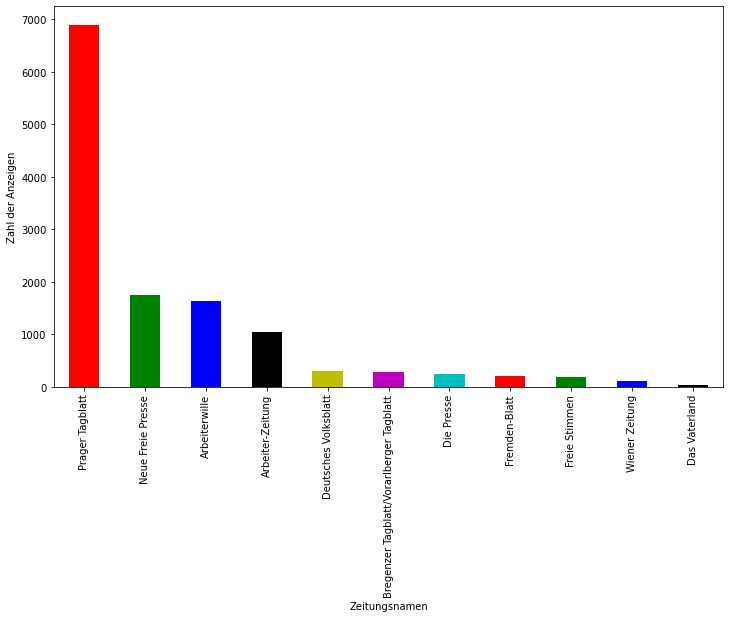

In [15]:
color_list = list('rgbkymc')
plt.figure(figsize=(12,7))

plt.xlabel("Zeitungsnamen")
plt.ylabel("Zahl der Anzeigen")

df_ads.pub_name.value_counts().plot(kind='bar', color=color_list)

### 3.3.  Visualisierung der Länge der Anzeigen

Anzahl der Buchstaben, inklusive Whitespace

<AxesSubplot:xlabel='Anzahl der der Buchstaben inkl. Whitespace', ylabel='Anzahl der Anzeigen'>

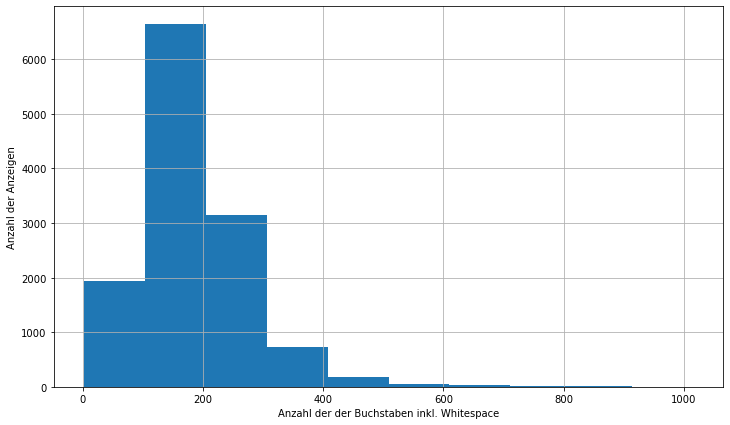

In [16]:
# visualizing job ad length ()

plt.figure(figsize=(12,7))
plt.ylabel("Anzahl der Anzeigen")
plt.xlabel("Anzahl der der Buchstaben inkl. Whitespace")

df_ads['OCR_text'].str.len().hist()

#### Anzeige der sehr kurzer Stellenanzeigen
Wie sehen sehr kurze Stellenanzeigen aus. Könnte dies an der bisher schlechten OCR liegen?

In [17]:
df_ads["num_types"] = df_ads['OCR_text'].str.len()
df_ads["num_types"] = df_ads["num_types"].apply(pd.to_numeric)

df_ads.head()

/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5362/2782651453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ads["num_types"] = df_ads['OCR_text'].str.len()
/var/folders/d1/x4qm1hmx4sj6q61rdmcwx57m0000gn/T/ipykernel_5362/2782651453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ads["num_types"] = df_ads["num_types"].apply(pd.to_numeric)


,identifier,region_class,pub_id,pub_name,img_name,date,OCR_text,num_types
0,ptb_19300406_20_SEARCH_0,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_0.jpg,1930,"Junger Mann\naus der Kolonalwarenbranche,\nnac...",314
1,ptb_19300406_20_SEARCH_1,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_1.jpg,1930,"21jähriger Beamter,\n\nmilitärfrei, in ekündig...",284
2,ptb_19300406_20_SEARCH_2,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_2.jpg,1930,Bilanzbuchhalter\nmit Lansskirr. Praxis in der...,258
3,ptb_19300406_20_SEARCH_3,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_3.jpg,1930,"Techniker,\n\n24 Jahre, militärfrei. Abſolvent...",267
4,ptb_19300406_20_SEARCH_4,SEARCH,ptb,Prager Tagblatt,ptb_19300406_20_SEARCH_4.jpg,1930,"Jüngerer Kontoriſt,\n19 Jahre, Deutſch, elwas ...",226


In [18]:
df_ads.dtypes

identifier      object
region_class    object
pub_id          object
pub_name        object
img_name        object
date             int64
OCR_text        object
num_types        int64
dtype: object

In [19]:
# filter df_ads, all ads that have 100 or less types
df_ads_short = df_ads[df_ads["num_types"] <= 100]

In [20]:
df_ads_short["OCR_text"].iloc[3]

'Süche perfekten 5567\nBuchhalter.\n\nChiffre: „Zukunſt . Z. 2004\n—4%“ an die Verw. Buattes.\n'

In [21]:
df_ads_short["OCR_text"].iloc[11]

'Bew. Wirtſchafterin\nfür Prager Herrn mit 2\nSöhnen ſucht ſofort 20426\nInſtitut Newekluf,\n** 38 un.\n'

In [22]:
df_ads_short["OCR_text"].iloc[100]

'Junge perfekte 9057\nHerrſchaftsköchin\nmit langj. Zeugn. empf.\nnre Anna Kohn.\n\nGeiſtgaſſe 4. 9057\n\n \n'

Es scheint, dass auch sehr kurze Anzeigen als normale Stellenanzeige wahrgenommen werden können. Man beachte, dass diese Texte bisher noch nicht bereinigt wurden. 
Grundsätzlich sollten diese Texte im Korpus enthalten bleiben. 

#### Verteilung der Längen der Anzeigen der Stellenangebote

<AxesSubplot:xlabel='Anzahl der der Buchstaben inkl. Whitespace', ylabel='Anzahl der Stellenangebot-Anzeigen'>

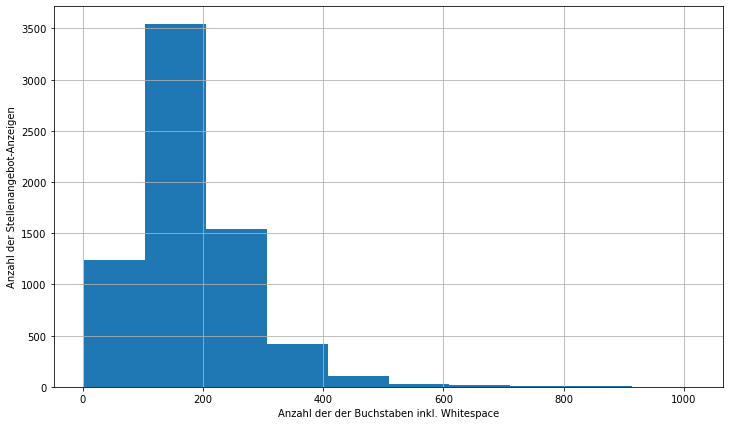

In [23]:
df_offer = df_ocr[df_ocr.region_class == "OFFER"]

# visualizing offer-ad length ()

plt.figure(figsize=(12,7))
plt.ylabel("Anzahl der Stellenangebot-Anzeigen")
plt.xlabel("Anzahl der der Buchstaben inkl. Whitespace")

df_offer['OCR_text'].str.len().hist()

#### Verteilung der Längen der Anzeigen der Stellengesuche

<AxesSubplot:xlabel='Anzahl der der Buchstaben inkl. Whitespace', ylabel='Anzahl der Stellengesuch-Anzeigen'>

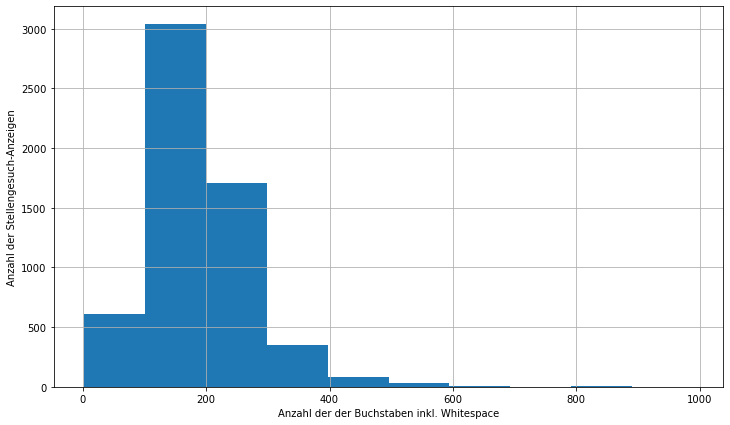

In [24]:
df_search = df_ocr[df_ocr.region_class == "SEARCH"]

# visualizing search-ad length ()

plt.figure(figsize=(12,7))
plt.ylabel("Anzahl der Stellengesuch-Anzeigen")
plt.xlabel("Anzahl der der Buchstaben inkl. Whitespace")

df_search['OCR_text'].str.len().hist()

##### 

### 3.4. Verteilung der Stellenanzeigen nach Jahr

<AxesSubplot:xlabel='Jahreszahlen der Anzeigen im Gesamtkorpus', ylabel='Anzahl der Anzeigen'>

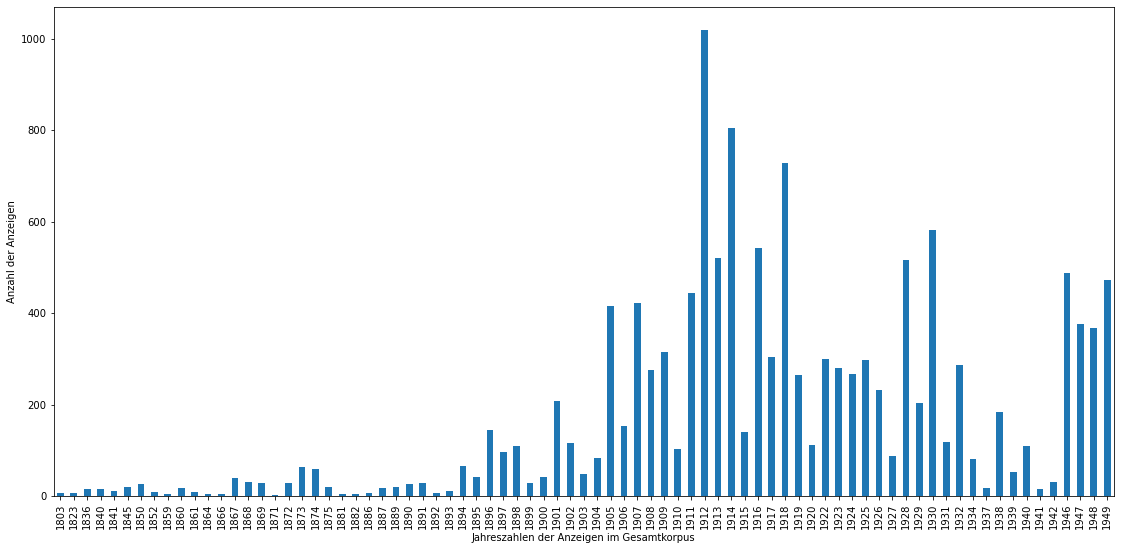

In [25]:
#Visualize numb of jobAds per year
plt.figure(figsize=(19,9))
plt.xlabel("Jahreszahlen der Anzeigen im Gesamtkorpus")
plt.ylabel("Anzahl der Anzeigen")
df_date= df_ocr["date"]
df_date.value_counts().sort_index().plot(kind='bar')

## 4. Export

In [26]:
#export df_ocr with all the information of this notebook

df_ads.to_csv('../output/3.1_korpus_analysen_ocr/ocr.csv', index=False)